## Project Overview - PER (Player Efficiency Rating)

In the NBA, "PER" stands for Player Efficiency Rating, a statistic developed by John Hollinger that measures a player's per-minute contribution by summing positive accomplishments (like points, assists, rebounds, steals, and blocks) and subtracting negative ones (missed shots, turnovers, and fouls). A league-average PER is always 15.00, allowing for year-to-year and cross-era comparisons, with higher scores indicating greater efficiency.

## Libraries

In [15]:
from nba_api.stats.endpoints import playergamelog, leaguegamefinder
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import playerdashboardbyyearoveryear
from nba_api.stats.endpoints import leaguedashplayerstats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Extraction

In [2]:
# Get 2024-25 season player stats
player_stats = leaguedashplayerstats.LeagueDashPlayerStats(season='2024-25')
df = player_stats.get_data_frames()[0]

In [3]:
# Explore what columns you have
print(df.columns.tolist())
print(df.head())

['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK', 'TEAM_COUNT']
   PLAYER_ID    PLAYER_NAME NICKNAME     TEAM_ID TEAM_ABBREVIATION   AGE  GP  \
0    1630639    A.J. Lawson     A.J.  1610612761               TOR  24.0  26   
1    1631260       AJ Green       AJ  1610612749               MIL  25.0  73   
2    16423

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PLAYER_ID              569 non-null    int64  
 1   PLAYER_NAME            569 non-null    object 
 2   NICKNAME               569 non-null    object 
 3   TEAM_ID                569 non-null    int64  
 4   TEAM_ABBREVIATION      569 non-null    object 
 5   AGE                    569 non-null    float64
 6   GP                     569 non-null    int64  
 7   W                      569 non-null    int64  
 8   L                      569 non-null    int64  
 9   W_PCT                  569 non-null    float64
 10  MIN                    569 non-null    float64
 11  FGM                    569 non-null    int64  
 12  FGA                    569 non-null    int64  
 13  FG_PCT                 569 non-null    float64
 14  FG3M                   569 non-null    int64  
 15  FG3A  

In [5]:
df.describe()

,PLAYER_ID,TEAM_ID,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,TEAM_COUNT
count,5.690000e+02,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,1.434007e+06,1.610613e+09,26.230228,46.231986,23.235501,22.996485,0.486895,1043.233743,180.256591,385.811951,...,277.785589,283.205624,282.683656,284.613357,284.300527,284.991213,203.226714,41.818981,284.827768,1.149385
std,4.963906e+05,8.626873e+00,4.220348,24.357135,15.596499,13.985404,0.202094,805.522063,171.087792,357.219330,...,169.713086,165.164946,162.283979,164.058963,164.421573,164.387815,91.113184,7.828527,164.253792,0.376002
min,2.544000e+03,1.610613e+09,19.000000,1.000000,0.000000,0.000000,0.000000,2.601667,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.628415e+06,1.610613e+09,23.000000,25.000000,10.000000,11.000000,0.355000,314.276667,40.000000,90.000000,...,141.000000,142.000000,142.000000,143.000000,143.000000,143.000000,134.000000,44.000000,143.000000,1.000000
50%,1.630288e+06,1.610613e+09,25.000000,50.000000,21.000000,23.000000,0.500000,907.458333,133.000000,287.000000,...,284.000000,282.000000,281.000000,284.000000,283.000000,285.000000,281.000000,44.000000,285.000000,1.000000
75%,1.631301e+06,1.610613e+09,29.000000,68.000000,36.000000,32.000000,0.618000,1716.348333,271.000000,579.000000,...,422.000000,425.000000,426.000000,427.000000,427.000000,427.000000,281.000000,44.000000,427.000000,1.000000
max,1.642530e+06,1.610613e+09,40.000000,82.000000,64.000000,64.000000,1.000000,3036.076667,860.000000,1656.000000,...,569.000000,569.000000,556.000000,561.000000,569.000000,569.000000,281.000000,44.000000,569.000000,3.000000


In [6]:
#  Summary on missing data
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Columns with missing data: {df.isnull().any().sum()}")
print("\nMissing values per column:")
print(df.isnull().sum())

Total missing values: 0
Columns with missing data: 0

Missing values per column:
PLAYER_ID                0
PLAYER_NAME              0
NICKNAME                 0
TEAM_ID                  0
TEAM_ABBREVIATION        0
                        ..
NBA_FANTASY_PTS_RANK     0
DD2_RANK                 0
TD3_RANK                 0
WNBA_FANTASY_PTS_RANK    0
TEAM_COUNT               0
Length: 67, dtype: int64


## Data Cleaning

### Remove Player with less than 10 games played

In [7]:
filtered_df = df[(df['MIN'] >= 10) & (df['GP'] >= 10)].copy()

print(f"Original players: {len(df)}")
print(f"Filtered players: {len(filtered_df)}")

Original players: 569
Filtered players: 508


### Remove Non-Useful Attributes

In [8]:
# List of columns to remove (all the ranking columns)
columns_to_drop = [
    'NICKNAME','TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 
    'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 
    'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 
    'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 
    'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 
    'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 
    'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 
    'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK', 'TEAM_COUNT'
]

# Remove the columns
cleaned_df = filtered_df.drop(columns=columns_to_drop, errors='ignore')

print(f"Original columns: {len(filtered_df.columns)}")
print(f"Cleaned columns: {len(cleaned_df.columns)}")

# Check remaining columns
print("\nRemaining columns:")
print(cleaned_df.columns.tolist())

Original columns: 67
Cleaned columns: 27

Remaining columns:
['PLAYER_ID', 'PLAYER_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS']


### Add Attributes average per game

In [17]:
# Create per-game averages for all counting stats
per_game_stats = cleaned_df.copy()

# List of stats to convert to per-game
counting_stats = ['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
                 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'PTS']

# Convert to per-game by dividing by games played
for stat in counting_stats:
    per_game_stats[f'{stat}_PG'] = per_game_stats[stat] / per_game_stats['GP']

# Keep percentage stats as they are (already rates)
percentage_stats = ['W_PCT', 'FG_PCT', 'FG3_PCT', 'FT_PCT']

# Create a dataframe with just the per-game stats for visualization
viz_columns = ['PLAYER_NAME', 'GP'] + [f'{stat}_PG' for stat in counting_stats] + percentage_stats
viz_df = per_game_stats[viz_columns]

print("Per-game columns created:")
print([col for col in viz_df.columns if col.endswith('_PG')])

Per-game columns created:
['MIN_PG', 'FGM_PG', 'FGA_PG', 'FG3M_PG', 'FG3A_PG', 'FTM_PG', 'FTA_PG', 'OREB_PG', 'DREB_PG', 'REB_PG', 'AST_PG', 'TOV_PG', 'STL_PG', 'BLK_PG', 'PF_PG', 'PTS_PG']


## Data Visualization

### Histograms

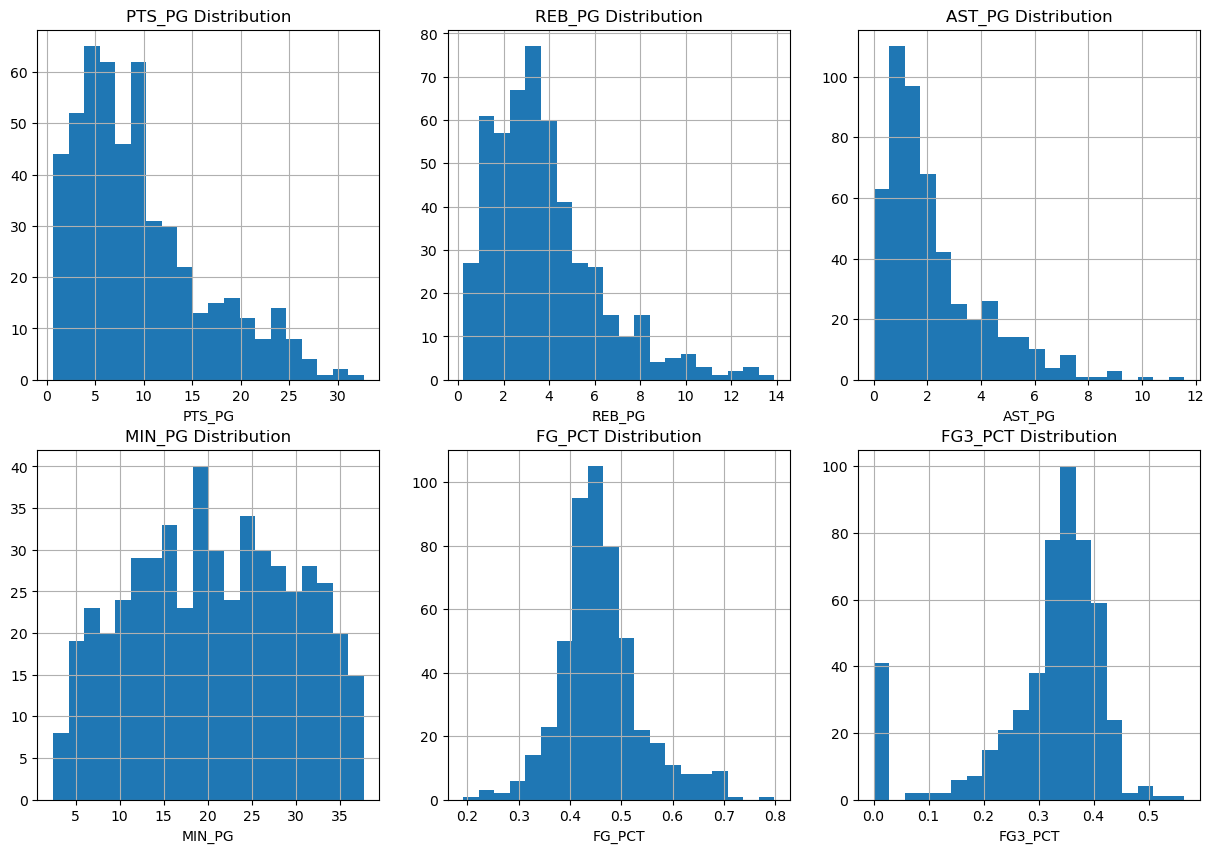

In [18]:
# Visualization with per-game stats
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
per_game_stats_viz = ['PTS_PG', 'REB_PG', 'AST_PG', 'MIN_PG', 'FG_PCT', 'FG3_PCT']

for i, stat in enumerate(per_game_stats_viz):
    row, col = i // 3, i % 3
    viz_df[stat].hist(bins=20, ax=axes[row, col])
    axes[row, col].set_title(f'{stat} Distribution')
    axes[row, col].set_xlabel(stat)

#### **Key Findings from Per-Game Statistics**

##### **Distribution Patterns:**
- Most counting stats (points, rebounds, assists) show **right-skewed distributions**
- Shooting percentages are more **normally distributed** around league averages
- Minutes played shows the most **uniform distribution** across players

##### **Scoring Insights:**
- Most players average **5-15 PPG**, with elite scorers (20+ PPG) being rare
- Peak around **8-10 PPG** reflects typical role player production

##### **Rebounding & Assists:**
- Rebounding clusters at **2-6 RPG**, showing position-dependent nature
- Assists show **extreme concentration** - most players under 3 APG
- Elite playmakers (**6+ APG**) are very uncommon

##### **Shooting Efficiency:**
- **FG%** centers around 45-50% (typical NBA efficiency)
- **3P%** shows bimodal pattern: non-shooters (0%) vs. competent shooters (35%)
- Reflects modern NBA specialization

##### **Playing Time:**
- **Evenly distributed**
- Suggests varied coaching rotation strategies

##### **Implications for PER:**
- Right-skewed distributions confirm **scarcity of high production**
- Normal shooting distributions help establish **efficiency baselines**
- These patterns will contextualize what constitutes **above-average performance**

### Boxplots for outlier detection

Text(0.5, 1.0, 'NBA Stats Box Plots')

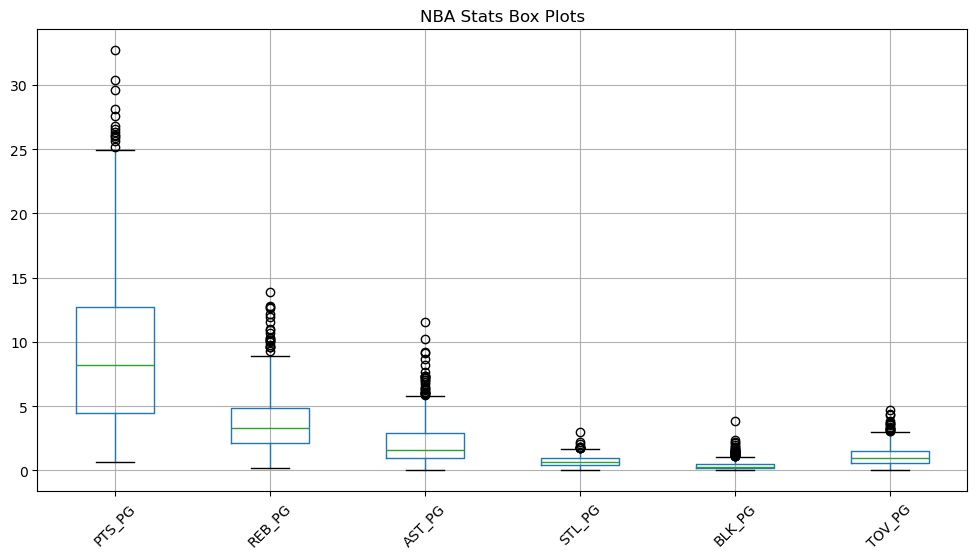

In [20]:
# Box plots to see outliers and quartiles
plt.figure(figsize=(12, 6))
key_stats = ['PTS_PG', 'REB_PG', 'AST_PG', 'STL_PG', 'BLK_PG', 'TOV_PG']
viz_df[key_stats].boxplot()
plt.xticks(rotation=45)
plt.title('NBA Stats Box Plots')

### **Key Findings from Box Plot Analysis**

#### **Outlier Patterns:**
- **PTS_PG** shows the most extreme outliers, with several players scoring 25+ PPG
- **AST_PG** has many outliers above 7+ assists, indicating elite playmakers stand out significantly
- **STL_PG** and **BLK_PG** show fewer outliers, suggesting defensive stats are more constrained

#### **Median Values & Distribution Shape:**
- **PTS_PG** median around **8-9 points**, with wide interquartile range
- **REB_PG** median around **3-4 rebounds**, showing tight distribution for most players
- **AST_PG** has very low median (**~2 assists**), confirming playmaking concentration
- **TOV_PG** shows tight distribution with median around **1.5 turnovers**

#### **Variability Insights:**
- **Scoring** shows the **widest spread**, reflecting diverse offensive roles
- **Rebounds** have moderate spread, likely position-dependent
- **Assists** show extreme concentration at low values with long tail of outliers
- **Steals and blocks** are tightly clustered, showing defensive consistency

#### **Statistical Implications:**
- Box plots confirm the **right-skewed nature** seen in histograms
- **Interquartile ranges** help identify what constitutes above-average performance
- **Outliers represent star players** who significantly exceed typical production
- These ranges will be useful for **contextualizing PER calculations** and identifying efficiency thresholds

#### **Performance Benchmarks:**
- Players above **Q3 (75th percentile)** in multiple categories likely represent key contributors
- **Outliers** in scoring/assists represent franchise players and primary options

### Correlation Heatmap

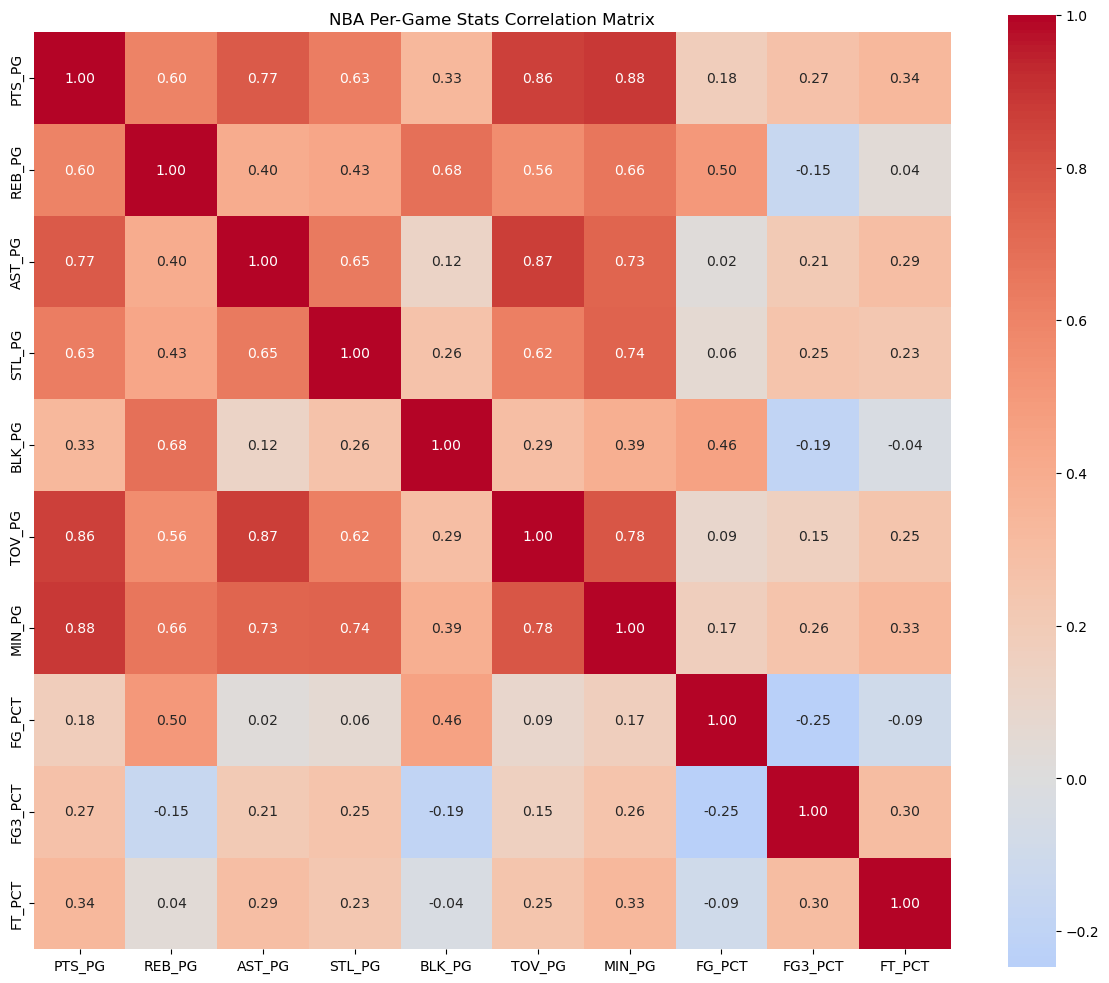

In [21]:
# Stats for correlation analysis
correlation_stats = [
    'PTS_PG',      # Points per game
    'REB_PG',      # Rebounds per game  
    'AST_PG',      # Assists per game
    'STL_PG',      # Steals per game
    'BLK_PG',      # Blocks per game
    'TOV_PG',      # Turnovers per game
    'MIN_PG',      # Minutes per game
    'FG_PCT',      # Field goal percentage
    'FG3_PCT',     # Three-point percentage
    'FT_PCT'       # Free throw percentage
]

plt.figure(figsize=(12, 10))
correlation_matrix = viz_df[correlation_stats].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True)
plt.title('NBA Per-Game Stats Correlation Matrix')
plt.tight_layout()

### **Key Findings from Correlation Heatmap**

#### **Strong Positive Correlations (0.7+):**
- **PTS_PG & MIN_PG (0.88)** - More playing time strongly correlates with scoring
- **PTS_PG & TOV_PG (0.86)** - High scorers tend to turn the ball over more
- **AST_PG & TOV_PG (0.87)** - Playmakers have higher turnover rates
- **PTS_PG & AST_PG (0.77)** - Scorers often create for others too

#### **Moderate Positive Correlations (0.5-0.7):**
- **REB_PG & BLK_PG (0.68)** - Big men who rebound also block shots
- **STL_PG & MIN_PG (0.74)** - More minutes lead to more steal opportunities
- **All counting stats correlate moderately with MIN_PG** - Playing time drives production

#### **Weak/Negative Correlations:**
- **Shooting percentages (FG_PCT, FG3_PCT, FT_PCT)** show minimal correlation with volume stats
- **FG_PCT & FG3_PCT (-0.25)** - Suggests different shooting skills
- **BLK_PG & FG3_PCT (-0.19)** - Centers (who block) don't shoot threes

#### **Key Insights:**
- **Volume vs Efficiency Trade-off:** High usage players (scorers/playmakers) don't necessarily shoot more efficiently
- **Role Specialization:** Shooting percentages are largely independent of counting stats
- **Minutes Drive Everything:** Playing time is the strongest predictor of statistical production
- **Turnover Penalty:** Elite offensive players pay a price in turnovers

#### **PER Calculation Implications:**
- **Minutes adjustment** will be crucial since playing time drives most correlations
- **Efficiency metrics** (shooting percentages) provide independent value beyond volume
- **Turnover penalties** in PER formula are justified by these correlations

### Scatter Plots For Relationships

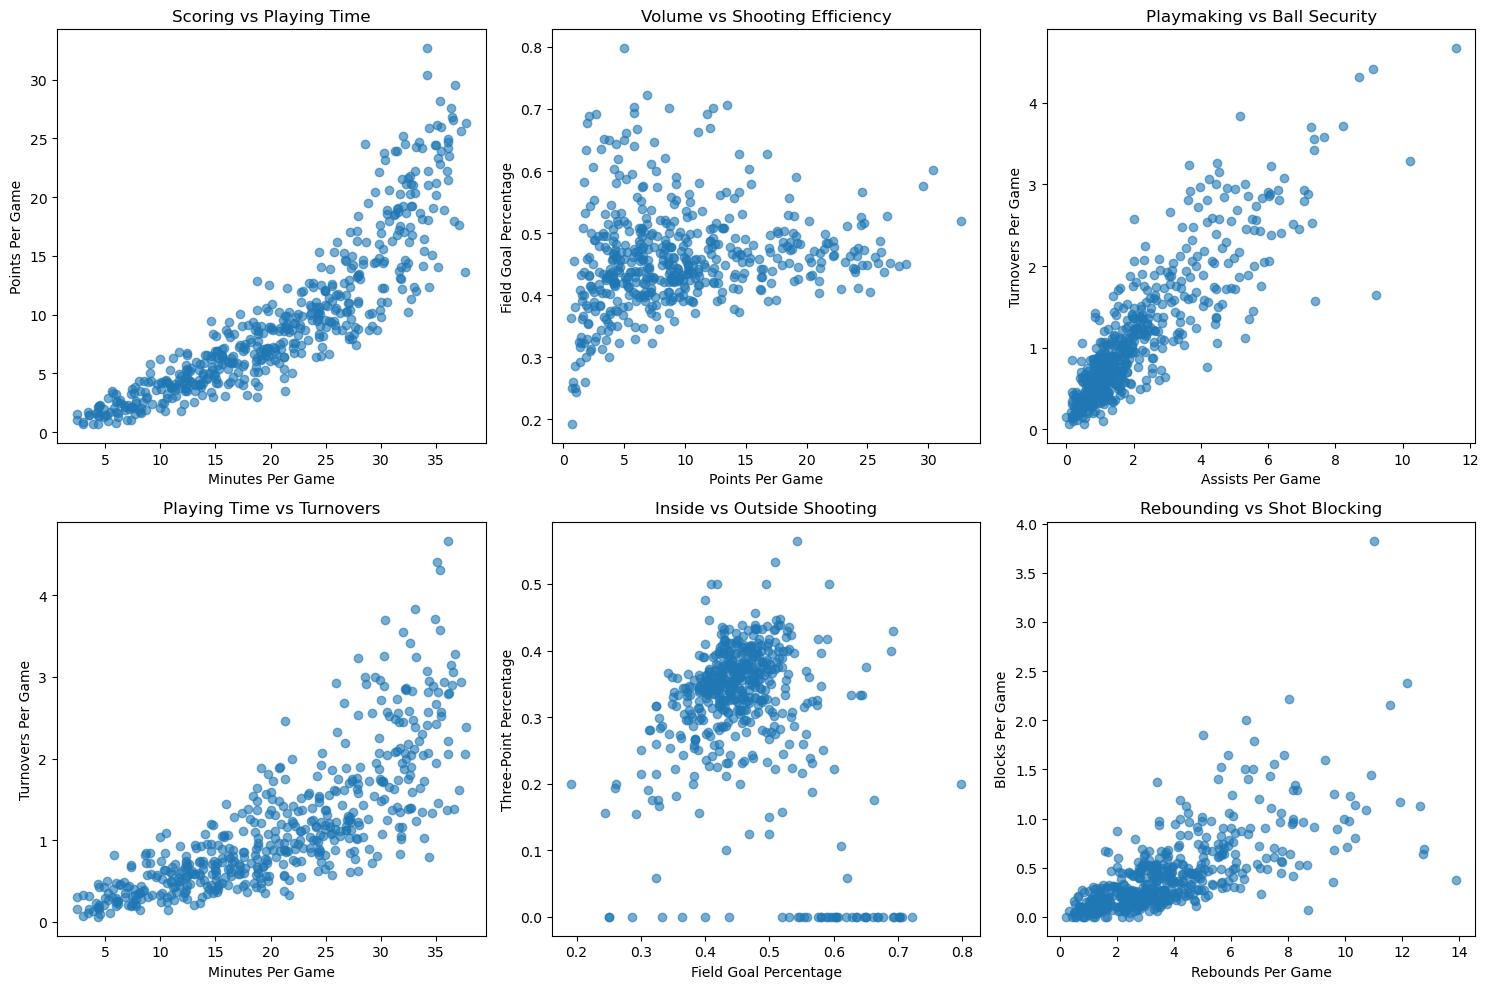

In [24]:
# 1. Efficiency vs Volume (most important)
plt.figure(figsize=(15, 10))

# Points vs Minutes (usage relationship)
plt.subplot(2, 3, 1)
plt.scatter(viz_df['MIN_PG'], viz_df['PTS_PG'], alpha=0.6)
plt.xlabel('Minutes Per Game')
plt.ylabel('Points Per Game')
plt.title('Scoring vs Playing Time')

# Points vs Field Goal Percentage (efficiency check)
plt.subplot(2, 3, 2)
plt.scatter(viz_df['PTS_PG'], viz_df['FG_PCT'], alpha=0.6)
plt.xlabel('Points Per Game')
plt.ylabel('Field Goal Percentage')
plt.title('Volume vs Shooting Efficiency')

# Assists vs Turnovers (playmaker trade-off)
plt.subplot(2, 3, 3)
plt.scatter(viz_df['AST_PG'], viz_df['TOV_PG'], alpha=0.6)
plt.xlabel('Assists Per Game')
plt.ylabel('Turnovers Per Game')
plt.title('Playmaking vs Ball Security')

# Minutes vs Turnovers (usage cost)
plt.subplot(2, 3, 4)
plt.scatter(viz_df['MIN_PG'], viz_df['TOV_PG'], alpha=0.6)
plt.xlabel('Minutes Per Game')
plt.ylabel('Turnovers Per Game')
plt.title('Playing Time vs Turnovers')

# 3P% vs FG% (shooting skill comparison)
plt.subplot(2, 3, 5)
plt.scatter(viz_df['FG_PCT'], viz_df['FG3_PCT'], alpha=0.6)
plt.xlabel('Field Goal Percentage')
plt.ylabel('Three-Point Percentage')
plt.title('Inside vs Outside Shooting')

# Rebounds vs Blocks (big man stats)
plt.subplot(2, 3, 6)
plt.scatter(viz_df['REB_PG'], viz_df['BLK_PG'], alpha=0.6)
plt.xlabel('Rebounds Per Game')
plt.ylabel('Blocks Per Game')
plt.title('Rebounding vs Shot Blocking')

plt.tight_layout()

### **Key Findings from Scatter Plot Analysis**

#### **Strong Linear Relationships:**
- **Scoring vs Playing Time** shows clear positive correlation - more minutes directly translates to more points
- **Playmaking vs Ball Security** reveals expected trade-off - elite playmakers (8+ assists) consistently have higher turnover rates
- **Playing Time vs Turnovers** demonstrates usage cost - players with heavy minutes bear greater turnover burden

#### **Efficiency vs Volume Trade-offs:**
- **Volume vs Shooting Efficiency** shows **no clear relationship** - high scorers don't necessarily shoot better percentages
- Most high-volume scorers (15+ PPG) cluster around **45-50% FG%**, suggesting efficiency ceiling
- **Few players achieve both high volume AND high efficiency** - indicating rarity of elite scorers

#### **Shooting Skill Specialization:**
- **Inside vs Outside Shooting** displays interesting patterns:
  - Large cluster of non-three-point shooters (0% 3P%) across all FG% levels
  - **Moderate positive correlation** among players who attempt threes
  - **Two distinct populations:** interior players vs. perimeter players

#### **Position-Specific Patterns:**
- **Rebounding vs Shot Blocking** shows clear clustering:
  - **Dense cluster** at low values (guards/wings)
  - **Moderate correlation** among big men who excel at both
  - **Few outliers** excel at one but not the other

#### **Basketball Reality Insights:**
- **Linear relationships** confirm fundamental basketball principles (more time = more opportunities)
- **Weak correlations** between volume and efficiency highlight the difficulty of elite production
- **Position specialization** clearly visible in shooting and interior stats
- **Usage comes with costs** - high-minute players accept higher turnover rates

#### **PER Calculation Implications:**
- **Minutes normalization** is crucial given strong time-dependent relationships
- **Efficiency bonuses** should be weighted heavily since volume doesn't guarantee efficiency
- **Position-neutral approach** makes sense given clear role specializations

## PER Calculation

In [10]:
# Unadjusted PER calculation
def calculate_unadjusted_per(row):
    # Positive actions with weights
    positive = (
        row['PTS'] * 1.0 +                    # Points: 1.0
        row['REB'] * 0.7 +                    # Rebounds: 0.7  
        row['AST'] * 0.7 +                    # Assists: 0.7
        row['STL'] * 1.0 +                    # Steals: 1.0
        row['BLK'] * 1.0 +                    # Blocks: 1.0
        row['FGM'] * 0.5 +                    # Made FG bonus: 0.5
        row['FTM'] * 0.5 -                    # Made FT bonus: 0.5
        row['FGA'] * 0.5 -                    # FG attempt penalty: -0.5
        row['FTA'] * 0.5                      # FT attempt penalty: -0.5
    )
    
    # Negative actions
    negative = (
        row['TOV'] * 1.0 +                    # Turnovers: -1.0
        (row['FGA'] - row['FGM']) * 0.5 +     # Missed FG: -0.5
        (row['FTA'] - row['FTM']) * 0.5       # Missed FT: -0.5
    )
    
    # PER per minute  
    if row['MIN'] > 0:
        uper = (positive - negative) / row['MIN']
        return uper
    else:
        return 0

In [11]:
cleaned_df['uPER'] = cleaned_df.apply(calculate_unadjusted_per, axis=1)

In [12]:
cleaned_df['uPER'].head()

0    0.394523
1    0.298588
2    0.248282
3    0.506457
4    0.363144
Name: uPER, dtype: float64

## Data Exploration

In [13]:
# Check the top performers
top_players = cleaned_df.nlargest(10, 'uPER')[['PLAYER_NAME', 'uPER']]
print(top_players)

                 PLAYER_NAME      uPER
423             Nikola Jokić  0.961037
180    Giannis Antetokounmpo  0.887299
490  Shai Gilgeous-Alexander  0.866367
567          Zion Williamson  0.782128
28             Anthony Davis  0.782005
550        Victor Wembanyama  0.777081
407              Moses Brown  0.752256
383            Mark Williams  0.739681
115           Daniel Gafford  0.739421
314       Karl-Anthony Towns  0.731667
